# Project Information
### Our EDA is divided into following parts:
- Data Understanding
- Data Cleaning and preprocessing
- Univariate Analysis
- Outliers Removal
- Segemented Univariate Analysis
- Bivariate Analysis
- Recommendations for Lending Club

## Group Members

### Shubhanshu Kumar Singh (APFE21709564)
### Abhishek Kumar Goyal(APFE21709647)

# Lending Club Case Study - Exploratory Data Analysis

# Import Libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pprint import pprint

In [148]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [149]:
import warnings
warnings.filterwarnings("ignore")

### load the loan dataset

In [150]:
loan_df = pd.read_csv("loan.csv")

# Data Understanding

### data contains 39717 rows and 111 columns

In [151]:
loan_df.shape

(39717, 111)

### display top 5 rows of loan_df

In [152]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

### display info about all the columns of loan_df

In [153]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# Data Cleaning

### Counting the NaN values across all columns in the dataframe

In [154]:
loan_df.isna().sum(axis = 0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Few observations from above code:

#### 1. So many columns contain NaN values accross all cells.
#### 2. NaN Counts in these columns are equal to total number of rows in loan_df
#### 3. These columns are of no relevance from analysis perspective and must be dropped from loan_df

### Dropping columns that contain NaN across all cells

In [155]:
loan_df.dropna(axis=1, how='all',inplace=True)

### Total column numbers reduced to 57 from 111

In [156]:
loan_df.shape

(39717, 57)

In [157]:
loan_df.isna().mean(axis = 0).round(4)*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Observations from above code:

#### 1. Still some columns contain NaN values.
#### 2. Mean % of NaN values in some columns is above 30%.
#### 3. Setting up a threshold of 30% and ignoring these columns from analysis perspective
#### 4. Columns whose mean of NaN values is above 30% will be dropped from loan_df

### Filtering the loan_df & ignoring columns whose mean of NaN values is above 0.3

In [158]:
loan_df = loan_df.loc[:, loan_df.isna().mean() <= .3]
loan_df.shape

(39717, 53)

#### Total column numbers reduced to 53 from 57

### Checking the status again....We'll take care of few more columns removal later in the code

In [159]:
loan_df.isna().mean(axis = 0).round(4)*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

### Importants points for some more columns removal:

#### 1. Drop columns where single value is getting repeated like pymnt_plan, initial_list_status, policy_code, application_type.
#### 2. Drop columns if all the cells contain 0.
#### 3. Drop URL column as it ends with id same as user id. Drop id, member_id as well. These are not relevant for our use case.
#### 4. Title seems like a sub category of purpose. So we should remove it as well.
#### 5. Drop columns out_prncp,out_prncp_inv,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d.
#### 6. Drop  colums collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens. They contain only 0 or NaN values.


In [160]:
drop_these_columns = ["id",
                      "member_id",
                      "url",
                      "pymnt_plan",
                      "initial_list_status",
                      "policy_code",
                      "application_type",
                      "title",
                      "out_prncp",
                      "out_prncp_inv",
                      "last_pymnt_d",
                      "last_pymnt_amnt",
                      "last_credit_pull_d",
                      "collections_12_mths_ex_med",
                      "chargeoff_within_12_mths",
                      "tax_liens"]
loan_df.drop(drop_these_columns, inplace=True, axis=1)
loan_df.shape

(39717, 37)

#### Total Column numbers reduced to 37 from 53

### Checking the columns where all cells contain 0 value

In [161]:
(loan_df == 0).all(axis=0)

loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
grade                      False
sub_grade                  False
emp_title                  False
emp_length                 False
home_ownership             False
annual_inc                 False
verification_status        False
issue_d                    False
loan_status                False
purpose                    False
zip_code                   False
addr_state                 False
dti                        False
delinq_2yrs                False
earliest_cr_line           False
inq_last_6mths             False
open_acc                   False
pub_rec                    False
revol_bal                  False
revol_util                 False
total_acc                  False
total_pymnt                False
total_pymnt_inv            False
total_rec_prncp            False
total_rec_

### Filtering out the loan_df. Ignoring columns that contain only 0 value across all cells

In [162]:
loan_df = loan_df.loc[:,~(loan_df == 0).all(axis=0)]
loan_df.shape

(39717, 35)

#### Total column numbers reduced to 35 from 37

### Cleaning and converting the follwing columns:
#### - xx from 'zip_code' & converting it to integer.
#### - "months" from 'term' & converting it to integer.

In [163]:
loan_df["zip_code"] = loan_df["zip_code"].apply(lambda x : int(x.rstrip("xx")))
loan_df["term"] = loan_df["term"].apply(lambda x : int(x.rstrip("months").strip()))

In [164]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### 1. Dropping rows where loan_status is Current as : 
#### a. We don't know their future status. 
#### b. Our EDA solely depends on Fully Paid (Non-Defaulters) and Charged Off (Defaulters)

In [165]:
loan_df = loan_df[loan_df["loan_status"] != "Current"]
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [166]:
loan_df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2386
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

### Dropping rows which contain NaN values. So that our dataset becomes totally free from NaN values

In [167]:
loan_df = loan_df.loc[loan_df.isna().mean(axis = 1)*100 == 0,:]
loan_df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
pub_rec_bankru

### Importants points for some more columns removal:

#### 1. Remove "grade" and "sub_grade" columns. They get assigned by LC post loan approval.
#### 2. Drop "emp_title" as there is no inference to be made from this. These are basically organization names.
#### 3. Drop "issue_d", "zip_code", "delinq_2yrs".
#### 4. Drop "earliest_cr_line" as no interesting pattern can be derived.
#### 5. Drop "inq_last_6mths", "open_acc", "total_acc", "revol_util", "revol_bal"
#### 6. Drop "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries","collection_recovery_fee"
#### 7. Above mentioned columns have been removed because they are useful only after loan approval.

In [168]:
drop_these_columns_2 = ["grade",
                        "sub_grade",
                        "emp_title",
                        "issue_d",
                        "zip_code",
                        "delinq_2yrs",
                        "earliest_cr_line",
                        "inq_last_6mths",
                        "open_acc",
                        "total_acc",
                        "revol_util",
                        "revol_bal",
                        "total_pymnt",
                        "total_pymnt_inv",
                        "total_rec_prncp",
                        "total_rec_int",
                        "total_rec_late_fee",
                        "recoveries",
                        "collection_recovery_fee"]
loan_df.drop(drop_these_columns_2, inplace=True, axis=1)
loan_df.shape

(35436, 16)

### converting int_rate to float

In [169]:
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x: float(x.rstrip("%")))
loan_df = loan_df.reset_index()
loan_df.drop("index",axis=1,inplace=True)

### Converting emp_length to numeric categories

#### 0 denotes < 1 years
#### 10 denotes 10+ years
#### Others are self explanatory

In [170]:
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: x.rstrip(" year").rstrip(" years"))
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: x.replace("< 1","0"))
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: x.replace("10+","10"))
loan_df["emp_length"] = loan_df["emp_length"].astype('int64')
loan_df["emp_length"].dtype

dtype('int64')

# Univariate Analysis

## Custom function for boxplot analysis

In [171]:
def boxplot_analysis(y_val,loan_df_,title_boxplot):
    plt.figure(figsize=(10,10))
    sns.set(font_scale = 2)
    sns.boxplot(y=y_val,data=loan_df_, palette='rainbow')
    plt.title(title_boxplot)
    sns.set()

## Box Plot of loan_amnt

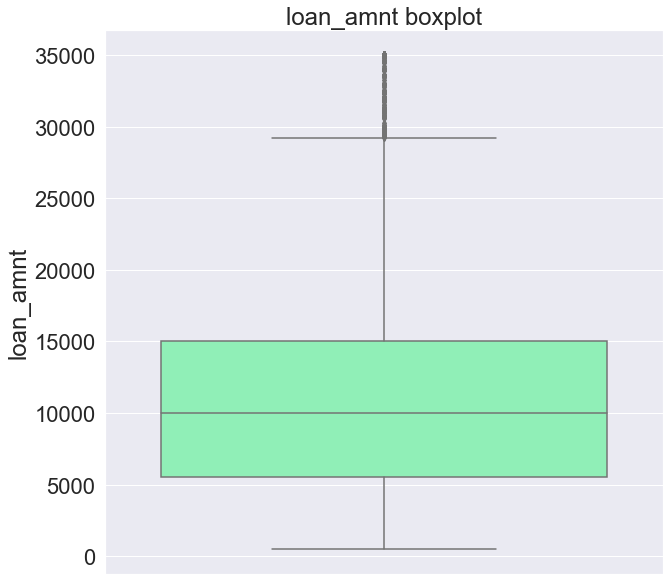

In [172]:
boxplot_analysis("loan_amnt",loan_df,"loan_amnt boxplot")

In [173]:
loan_df["loan_amnt"].describe()

count    35436.000000
mean     11128.678463
std       7327.775330
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Box Plot of funded_amnt

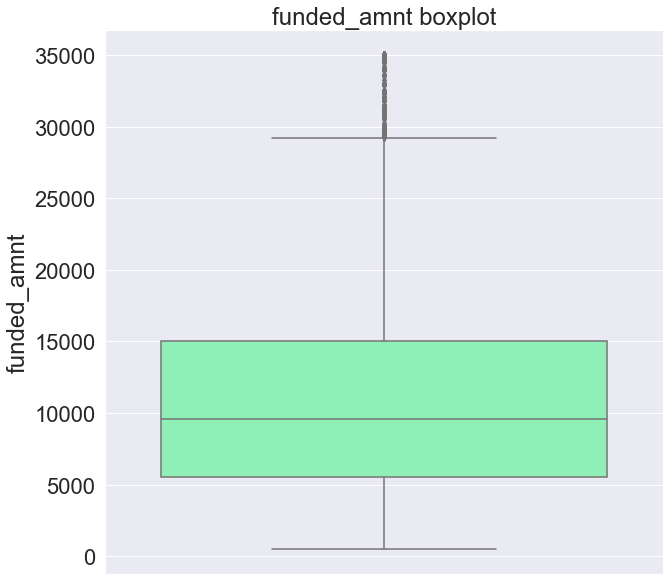

In [174]:
boxplot_analysis("funded_amnt",loan_df,"funded_amnt boxplot")

In [175]:
loan_df["funded_amnt"].describe()

count    35436.000000
mean     10862.403347
std       7071.230950
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

## Box Plot of funded_amnt_inv

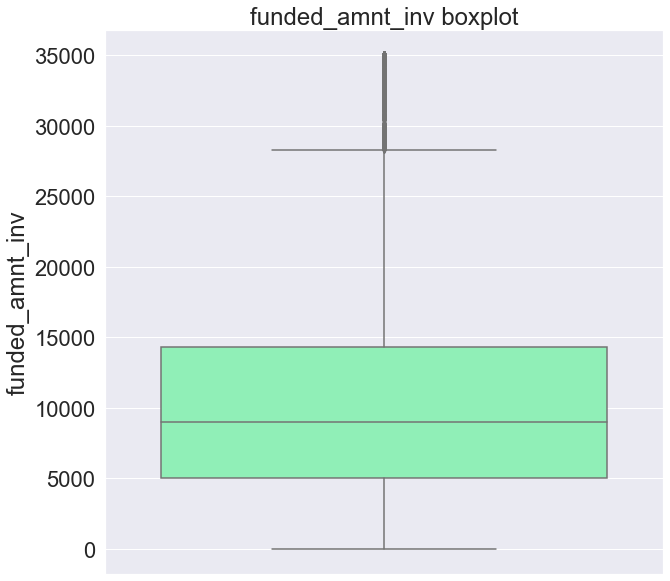

In [176]:
boxplot_analysis("funded_amnt_inv",loan_df,"funded_amnt_inv boxplot")

In [177]:
loan_df["funded_amnt_inv"].describe()

count    35436.000000
mean     10421.070757
std       6968.304709
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14300.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

## Few observations from above code
### 1. The boxplot of "loan_amnt", "funded_amnt" and "funded_amnt_inv" are almost similar to each other.
### 2. So we'll be dropping "funded_amnt" and "funded_amnt_inv" from loan_df and using "loan_amnt" for further analysis .

In [178]:
loan_df.drop(["funded_amnt","funded_amnt_inv"],axis=1,inplace=True)
loan_df.shape

(35436, 14)

## Removing Outliers from loan_amnt using IQR logic

In [179]:
annual_inc_Q1 = loan_df["loan_amnt"].quantile(0.25)
annual_inc_Q3 = loan_df["loan_amnt"].quantile(0.75)
annual_inc_IQR = annual_inc_Q3 - annual_inc_Q1
loan_df = loan_df[~(loan_df["loan_amnt"] < (annual_inc_Q1 - 1.5*annual_inc_IQR))]
loan_df = loan_df[~(loan_df["loan_amnt"] > (annual_inc_Q3 + 1.5*annual_inc_IQR))]
loan_df.shape

(34426, 14)

## Box Plot of loan_amnt after removing outliers

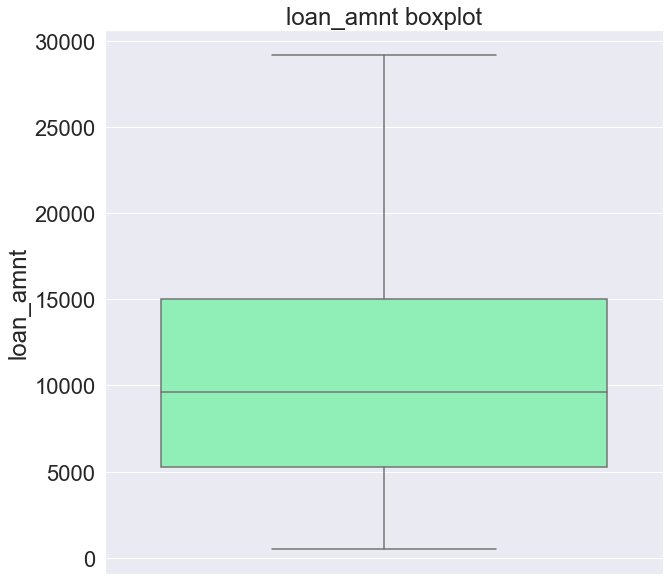

In [180]:
boxplot_analysis("loan_amnt",loan_df,"loan_amnt boxplot")

## Box Plot of annual_inc

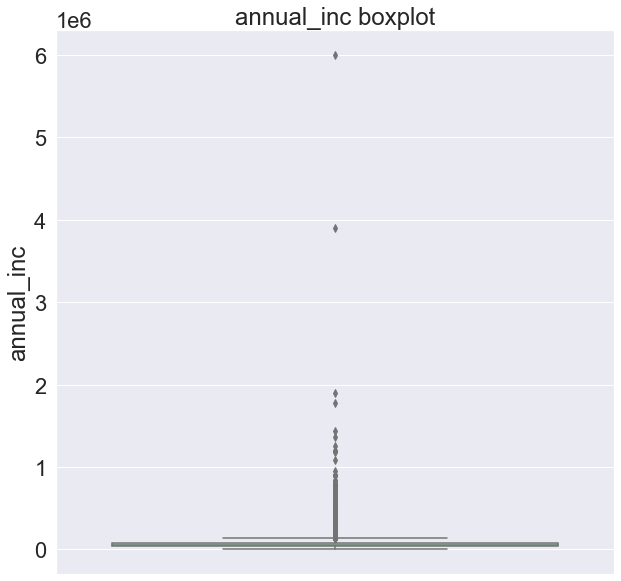

In [181]:
boxplot_analysis("annual_inc",loan_df,"annual_inc boxplot")

## From above boxplot, we can infer that annual_inc contains too many outliers. So we'll be removing outliers using IQR logic.

In [182]:
for i in range(3):
    annual_inc_Q1 = loan_df["annual_inc"].quantile(0.25)
    annual_inc_Q3 = loan_df["annual_inc"].quantile(0.75)
    annual_inc_IQR = annual_inc_Q3 - annual_inc_Q1
    
    loan_df = loan_df[~(loan_df["annual_inc"] < (annual_inc_Q1 - 1.5*annual_inc_IQR))]
    loan_df = loan_df[~(loan_df["annual_inc"] > (annual_inc_Q3 + 1.5*annual_inc_IQR))]

In [183]:
loan_df.shape

(32323, 14)

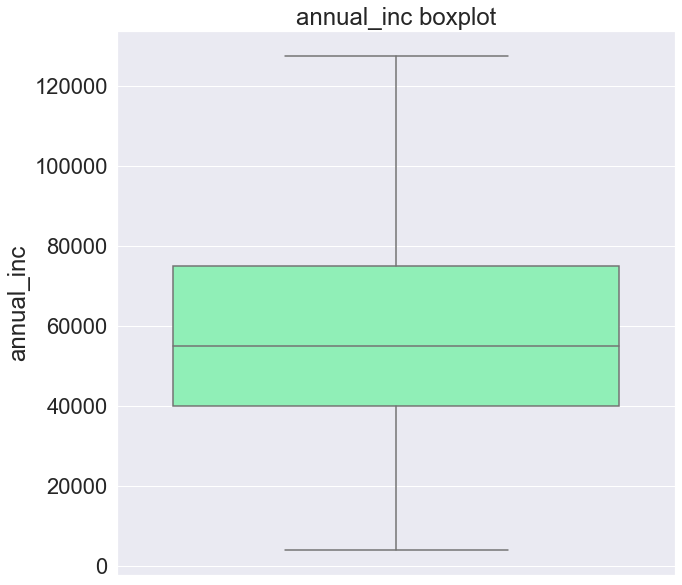

In [184]:
boxplot_analysis("annual_inc",loan_df,"annual_inc boxplot")

## Box Plot of dti

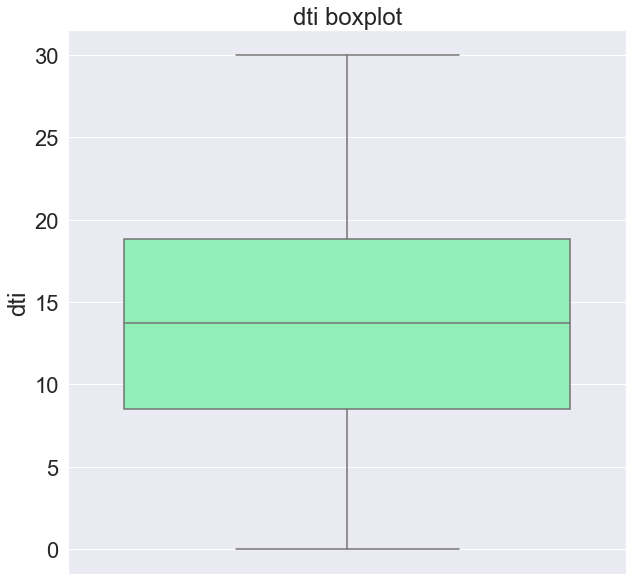

In [185]:
boxplot_analysis("dti",loan_df,"dti boxplot")

# Segmented Univariate Analysis

## Custom function for segmented boxplot analysis

In [186]:
def segmented_boxplot_analysis(x_val,y_val,loan_df_,title_boxplot):
    plt.figure(figsize=(10,10))
    sns.set(font_scale = 2)
    plt.figure(figsize=(10,10))
    sns.boxplot(x=x_val,y=y_val,data=loan_df_, palette='rainbow')
    plt.title(title_boxplot)
    sns.set()

<Figure size 720x720 with 0 Axes>

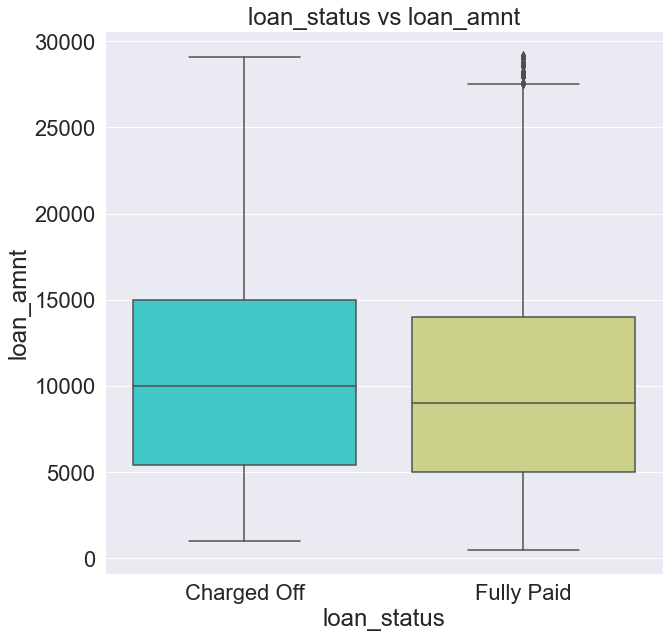

In [187]:
segmented_boxplot_analysis("loan_status","loan_amnt",loan_df,"loan_status vs loan_amnt")

# Key observation from above plot:

## Higher the loan amount, higher the chances of being charged off.

<Figure size 720x720 with 0 Axes>

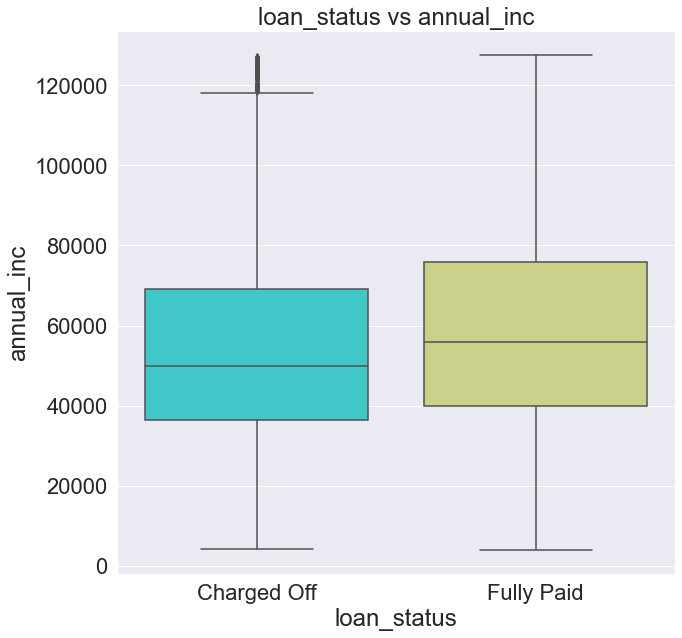

In [188]:
segmented_boxplot_analysis("loan_status","annual_inc",loan_df,"loan_status vs annual_inc")

## Key observation from above plot:

### Higher the annual income, higher the chances of loan getting fully paid.

# Bivariate Analysis

## Custom function for countplot with percentage

In [189]:
def plot_countplot_with_percentage(fig_x,
                                   fig_y,
                                   x_val,
                                   hue_val,
                                   loan_df,
                                   font_scale_size,
                                   title_fontsize,
                                   plt_title_sent,
                                   ha_val,
                                   rotation_degree):
    sns.set(style="whitegrid")
    plt.figure(figsize=(fig_x,fig_y))
    total = float(len(loan_df))
    sns.set(font_scale = font_scale_size)
    ax = sns.countplot(x=x_val, hue=hue_val, data=loan_df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degree)
    plt.title(plt_title_sent, fontsize=title_fontsize)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha=ha_val)
    plt.show()
    sns.set()

## Custom function for catplot analysis

In [190]:
def catplot_analysis(x,y,loan_df_,font_scale_val,height_val,aspect_val,rotation_degree):
    sns.set(font_scale=font_scale_val)
    g = (loan_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,
                                                                                                       'data'), 
                                                                                                      x=x,
                                                                                                      y='percent',
                                                                                                      hue=y,
                                                                                                      kind='bar',
                                                                                                      height=height_val,
                                                                                                      aspect=aspect_val
                                                                                                      ))
    
    for ax in g.axes.flat:
        labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=rotation_degree)
    plt.show()
    sns.set()

## Plotting countplot with percentage for home_ownership under loan_status category

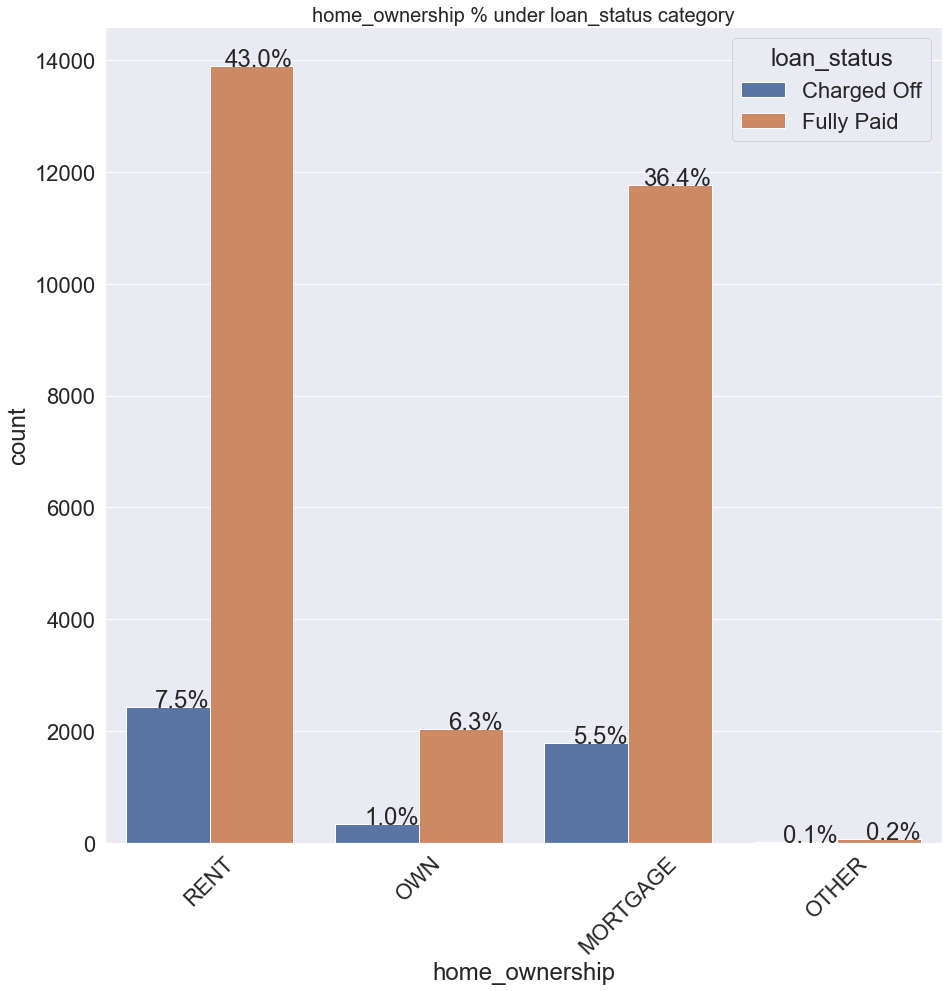

In [191]:
plot_countplot_with_percentage(15,
                               15,
                               "home_ownership",
                               "loan_status",
                               loan_df,
                               2,
                               20,
                               "home_ownership % under loan_status category",
                               "right",
                               45)

# Key observation from above plot:

## The number of borrowers whose home ownership are under RENT category are highest in percentage from both Fully Paid/Charged off perspective

## Plotting countplot with percentage for emp_length under loan_status category

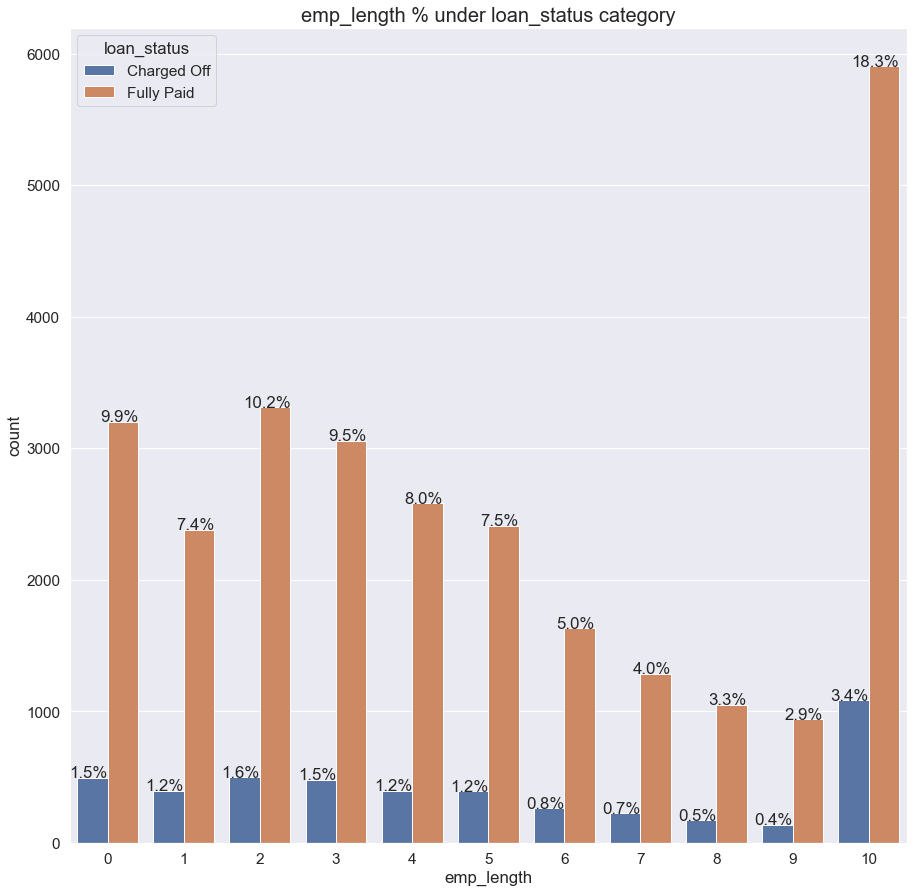

In [192]:
plot_countplot_with_percentage(15,
                               15,
                               "emp_length",
                               "loan_status",
                               loan_df,
                               1.4,
                               20,
                               "emp_length % under loan_status category",
                               "right",
                               0)

# Key observations from above plot:

## 1. The number of borrowers whose employment length is equal or greater than 10 years have been granted the maximum number of loans.
## 2. The number of loans granted decrease for emp_length of 2 to 9 years.
## 3. However number of loans for emp_length of less than 1 year is significantly on higher side compared to 2 to 9 years.

## Plotting countplot with percentage for term under loan_status category

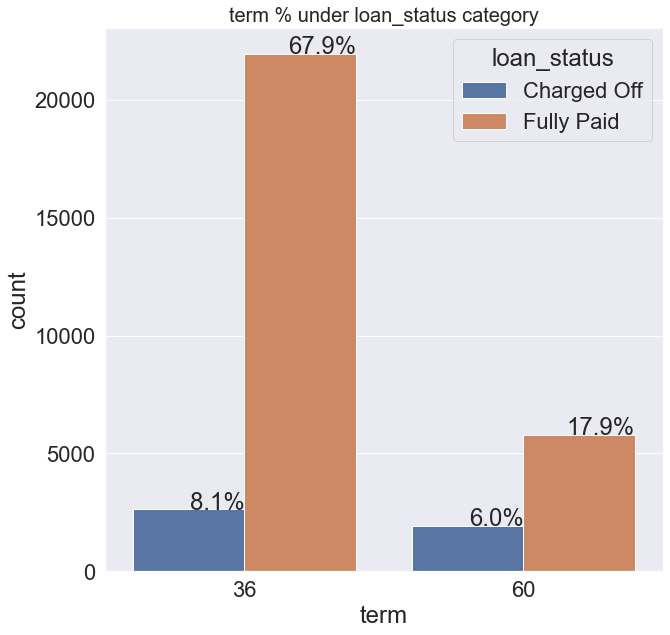

In [194]:
plot_countplot_with_percentage(10,
                               10,
                               "term",
                               "loan_status",
                               loan_df,
                               2,
                               20,
                               "term % under loan_status category",
                               "right",
                               0)

# Key observation from above plot:

## Borrowers with 36 months of loan repayment term are higher in number (76%)

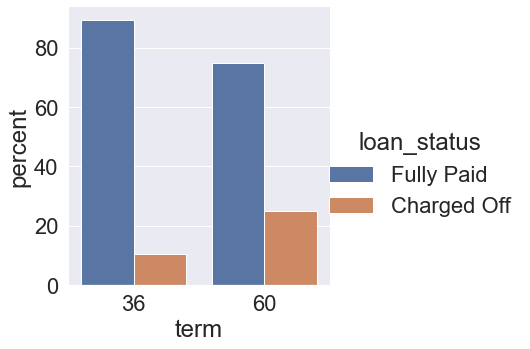

In [195]:
catplot_analysis("term","loan_status",loan_df,2,5,1,0)

# Key observation from above plot:

## Borrowers with 60 months of loan repayment term are more likey to get charged off.

## Plotting countplot with percentage for purpose under loan_status category

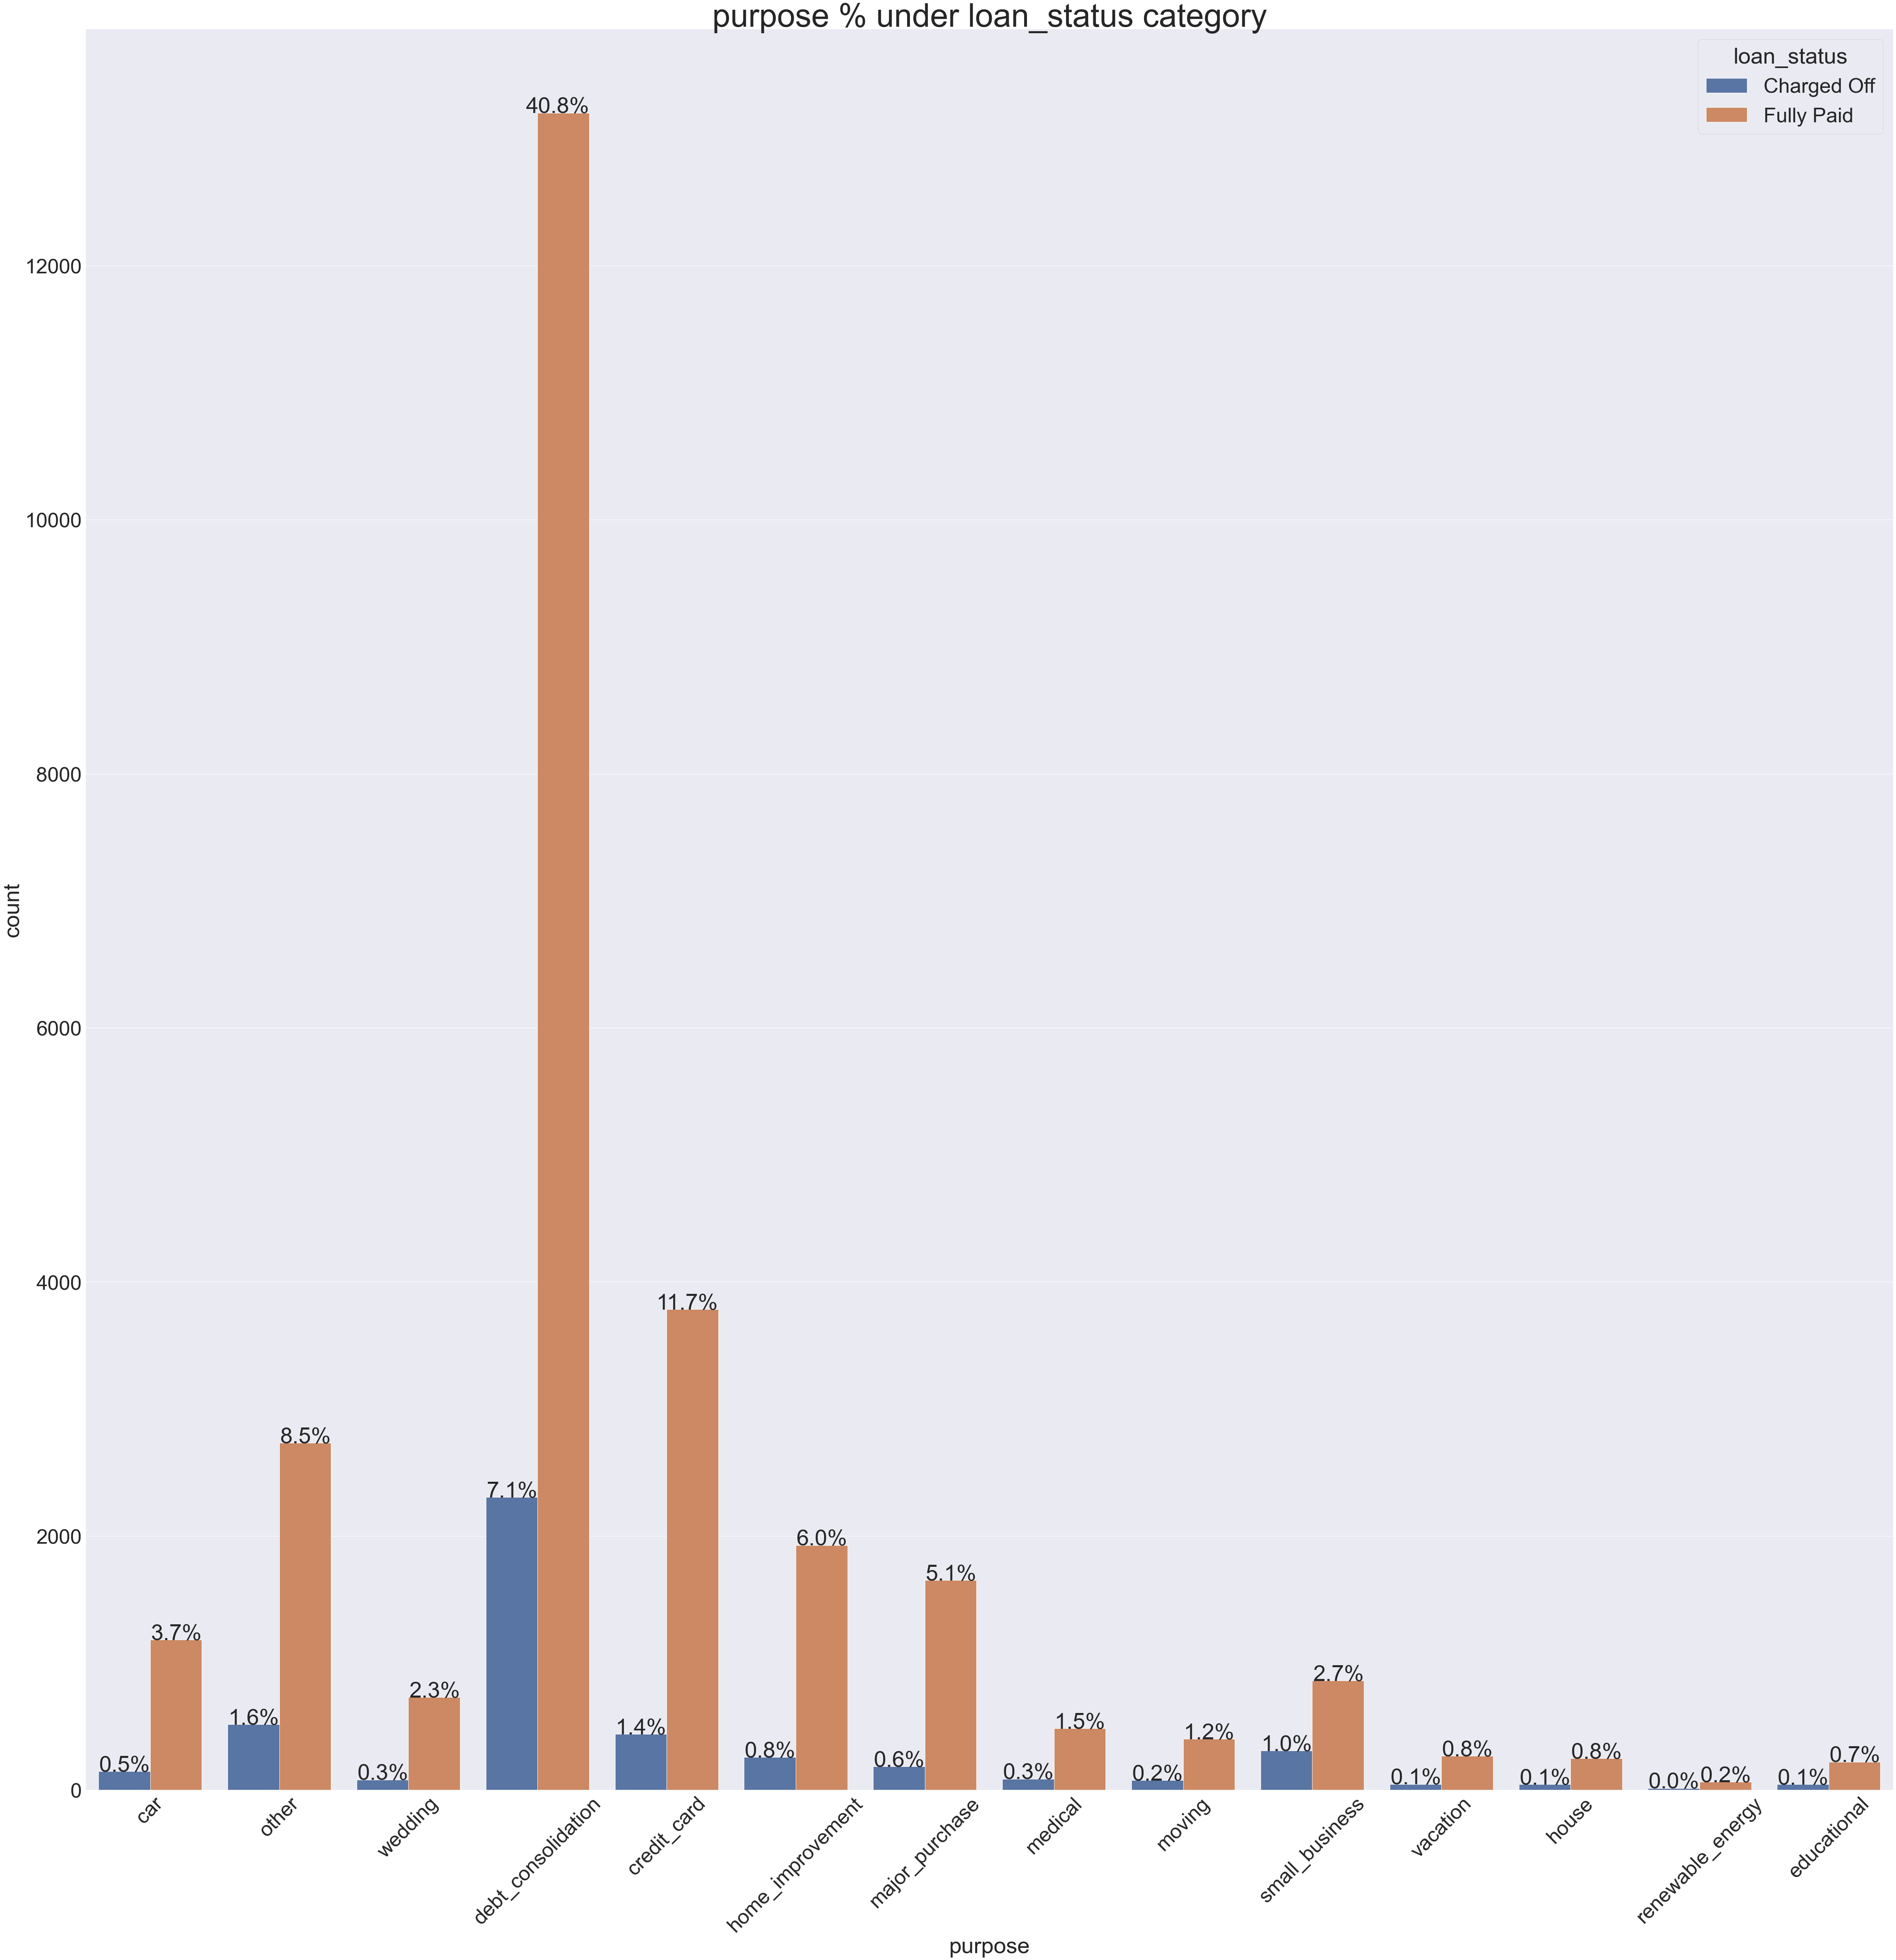

In [196]:
plot_countplot_with_percentage(80,
                               80,
                               "purpose",
                               "loan_status",
                               loan_df,
                               4.6,
                               80,
                               "purpose % under loan_status category",
                               "right",
                               45)

# Key observation from above plot:

## Maximum loans were granted under debt consolidation category

## Plotting countplot with percentage for verification_status under loan_status category

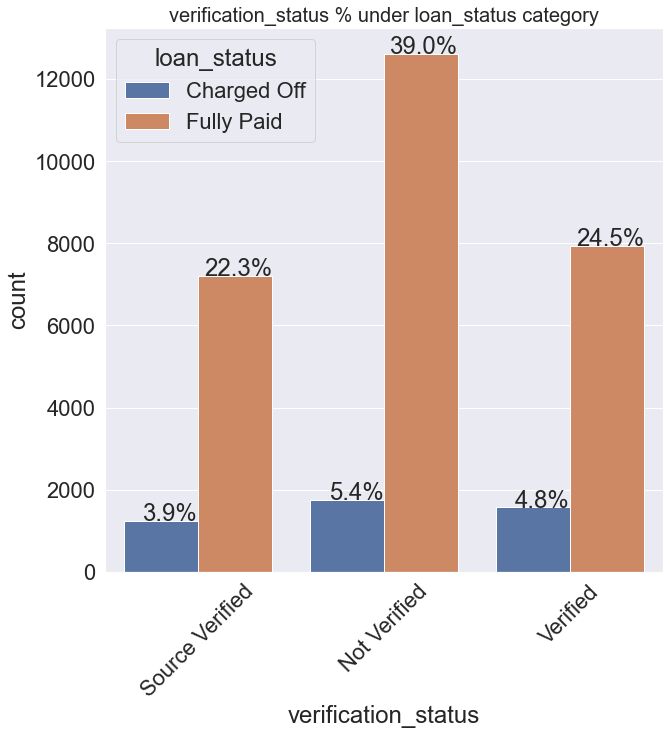

In [197]:
plot_countplot_with_percentage(10,
                               10,
                               "verification_status",
                               "loan_status",
                               loan_df,
                               2,
                               20,
                               "verification_status % under loan_status category",
                               "right",
                               45)

# Key observation from above plot:

## Most of the borrowers to whom the loans were granted were Not Verified.

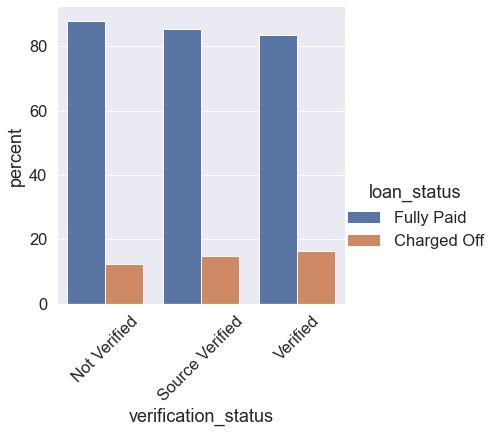

In [198]:
catplot_analysis("verification_status","loan_status",loan_df,1.5,5,1,45)


# Key observation from above plot:

## The maximum % of borrowers who were charged off were Verified

## Plotting countplot with percentage for addr_state under loan_status category

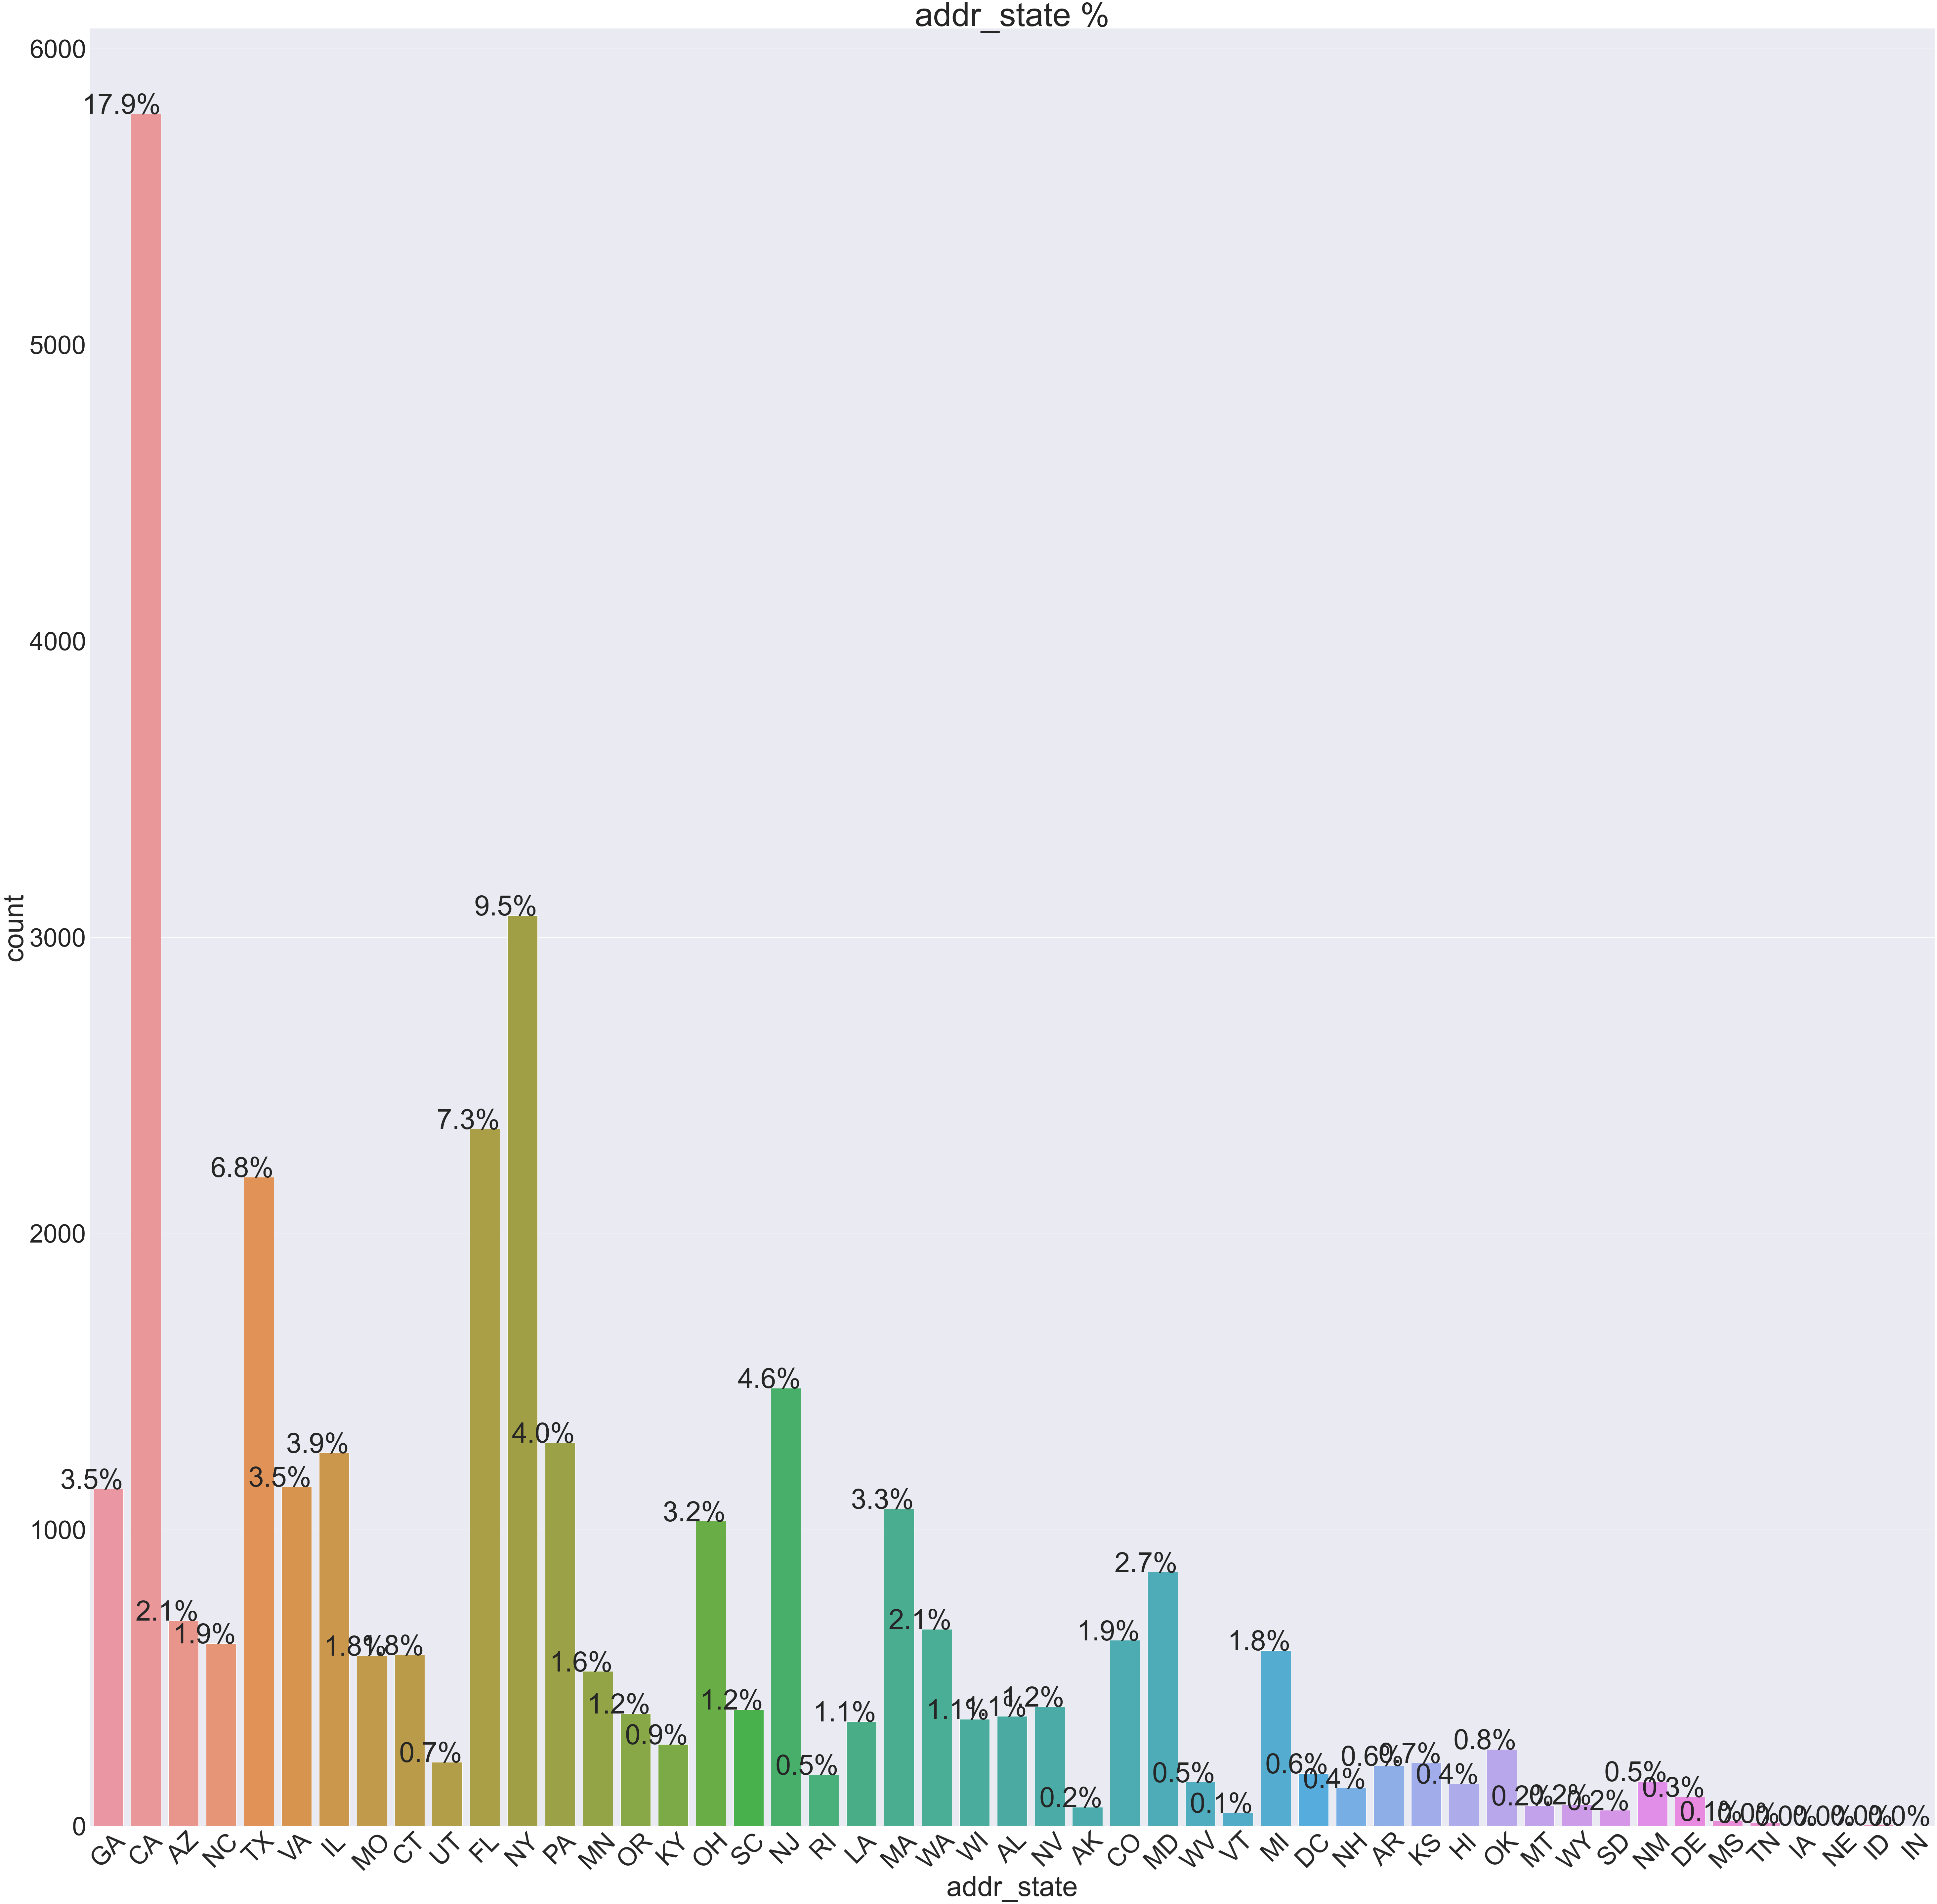

In [199]:
plot_countplot_with_percentage(100,
                               100,
                               "addr_state",
                               None,
                               loan_df,
                               7,
                               100,
                               "addr_state %",
                               "right",
                               45)

# Key observation from above plot:

## The maximum number of loans granted to borrowers from CA region

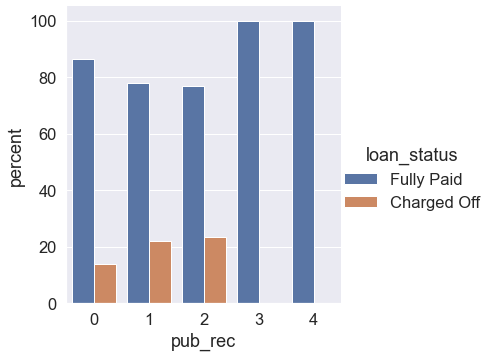

In [200]:
catplot_analysis("pub_rec","loan_status",loan_df,1.5,5,1,0)

# Key observation from above plot:

## Borrowers with higher public derogatory records were more likely to fully pay off their loans in order to improve their credit records.

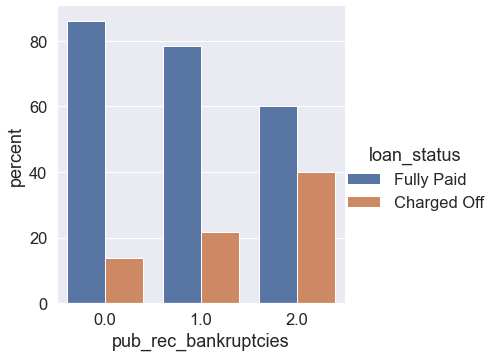

In [201]:
catplot_analysis("pub_rec_bankruptcies","loan_status",loan_df,1.5,5,1,0)

# Key observation from above plot:

## Borrowers with higher public bankruptcy records were more likely to get charged off.

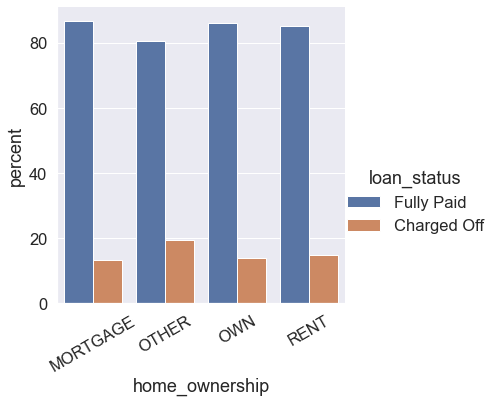

In [202]:
catplot_analysis("home_ownership","loan_status",loan_df,1.5,5,1,30)

# Key observation from above plot:

## Borrowers with home_ownership as 'OTHER' were more likely to get charged off.

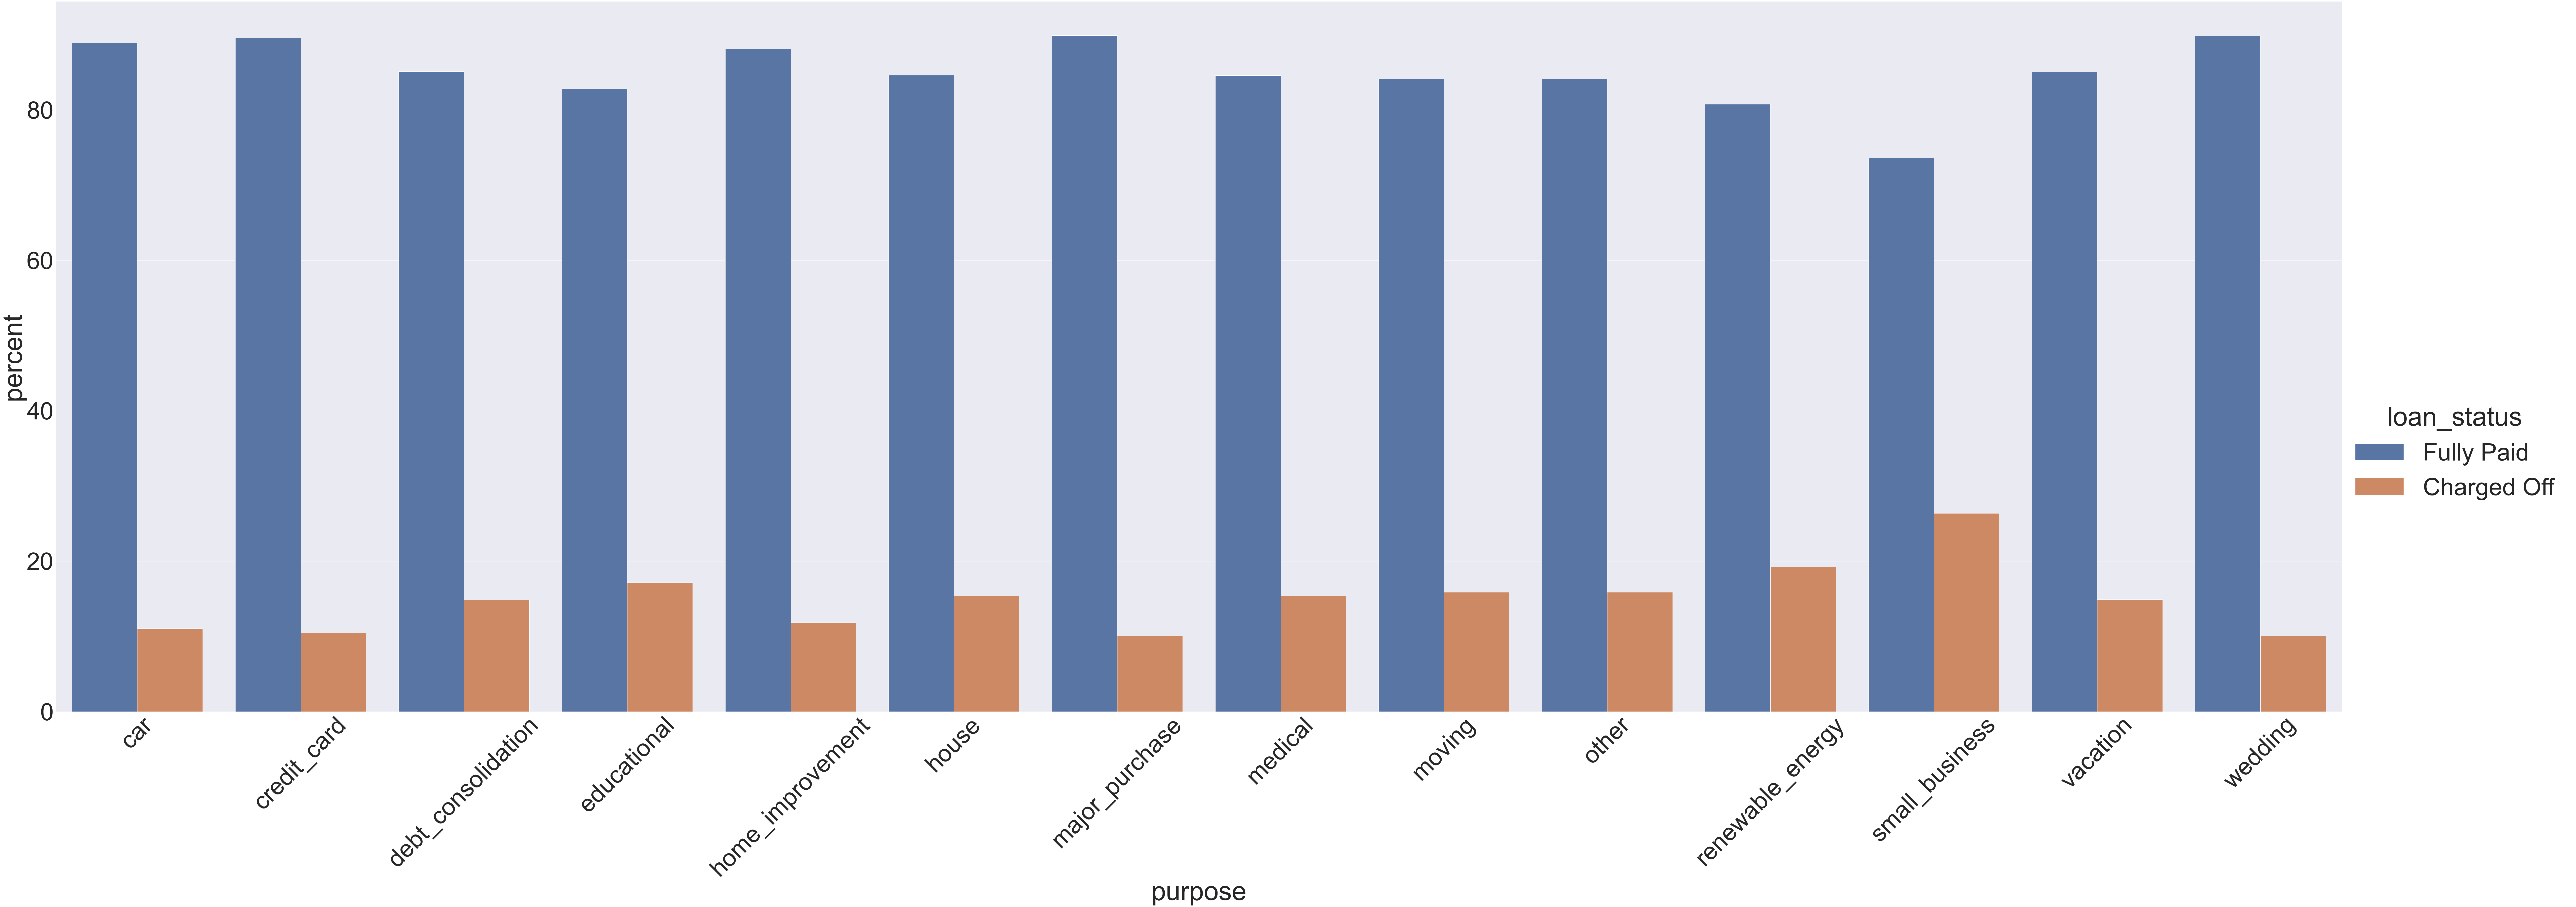

In [203]:
catplot_analysis("purpose","loan_status",loan_df,10,50,3,45)

# Key observation from above plot:

## Borrowers who took loan for the purpose of 'small_business' had the highest percentage of total loans that were charged off.

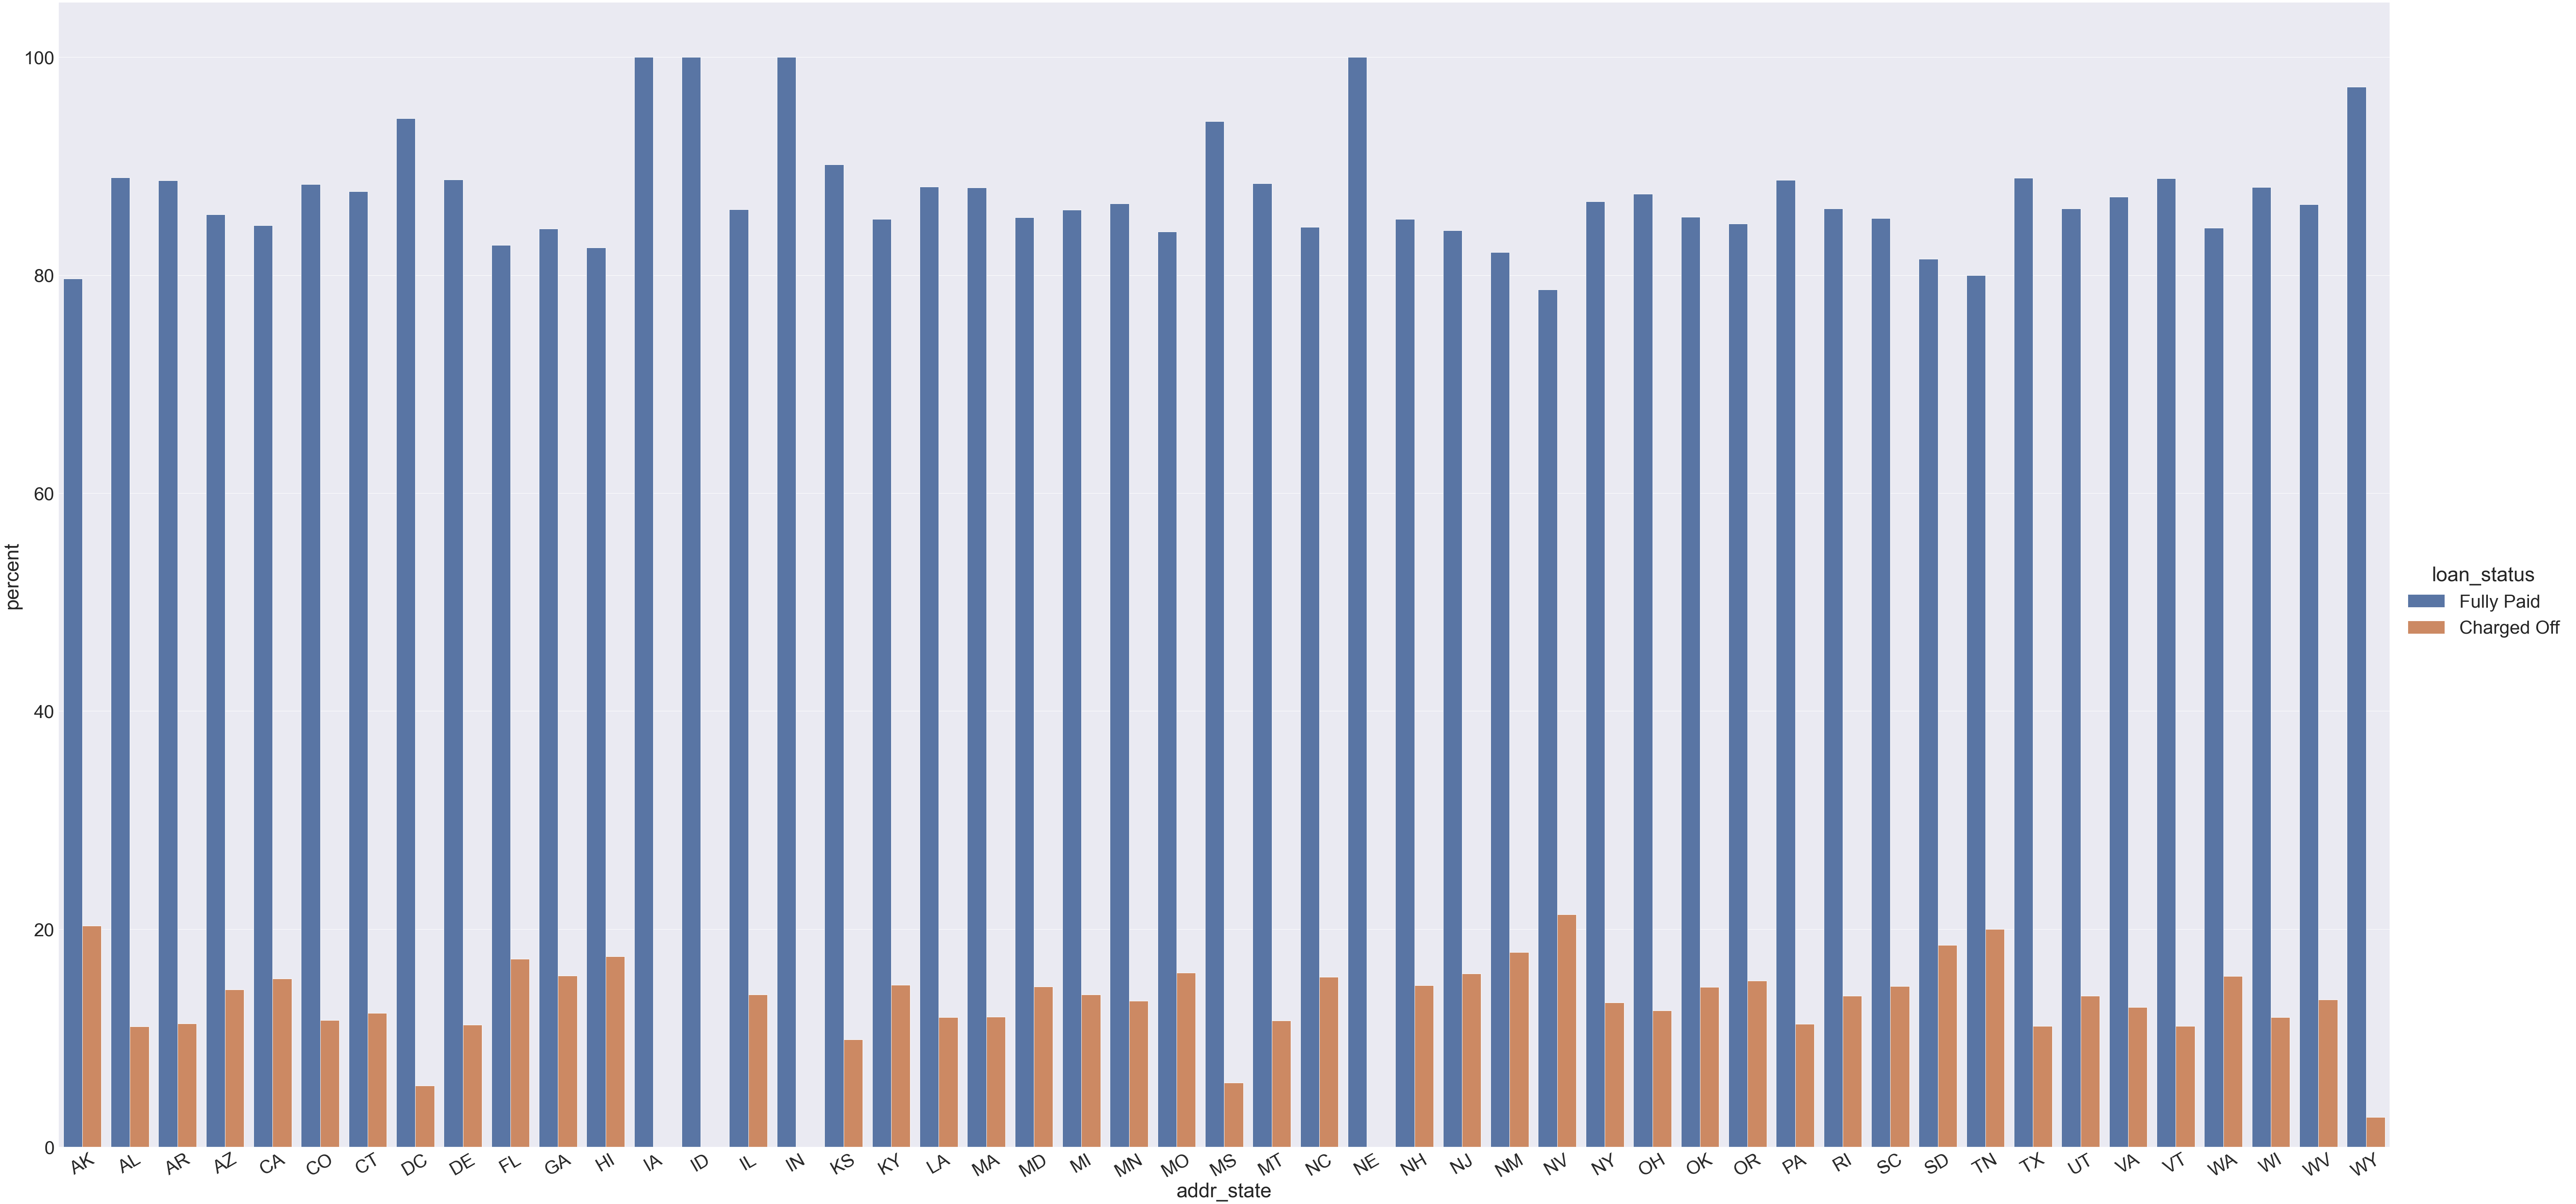

In [204]:
catplot_analysis("addr_state","loan_status",loan_df,4,40,2,30)

# Key observation from above plot:

## Most borrowers from 'NV' state were charged off.

# Correlation Analysis using Heatmap

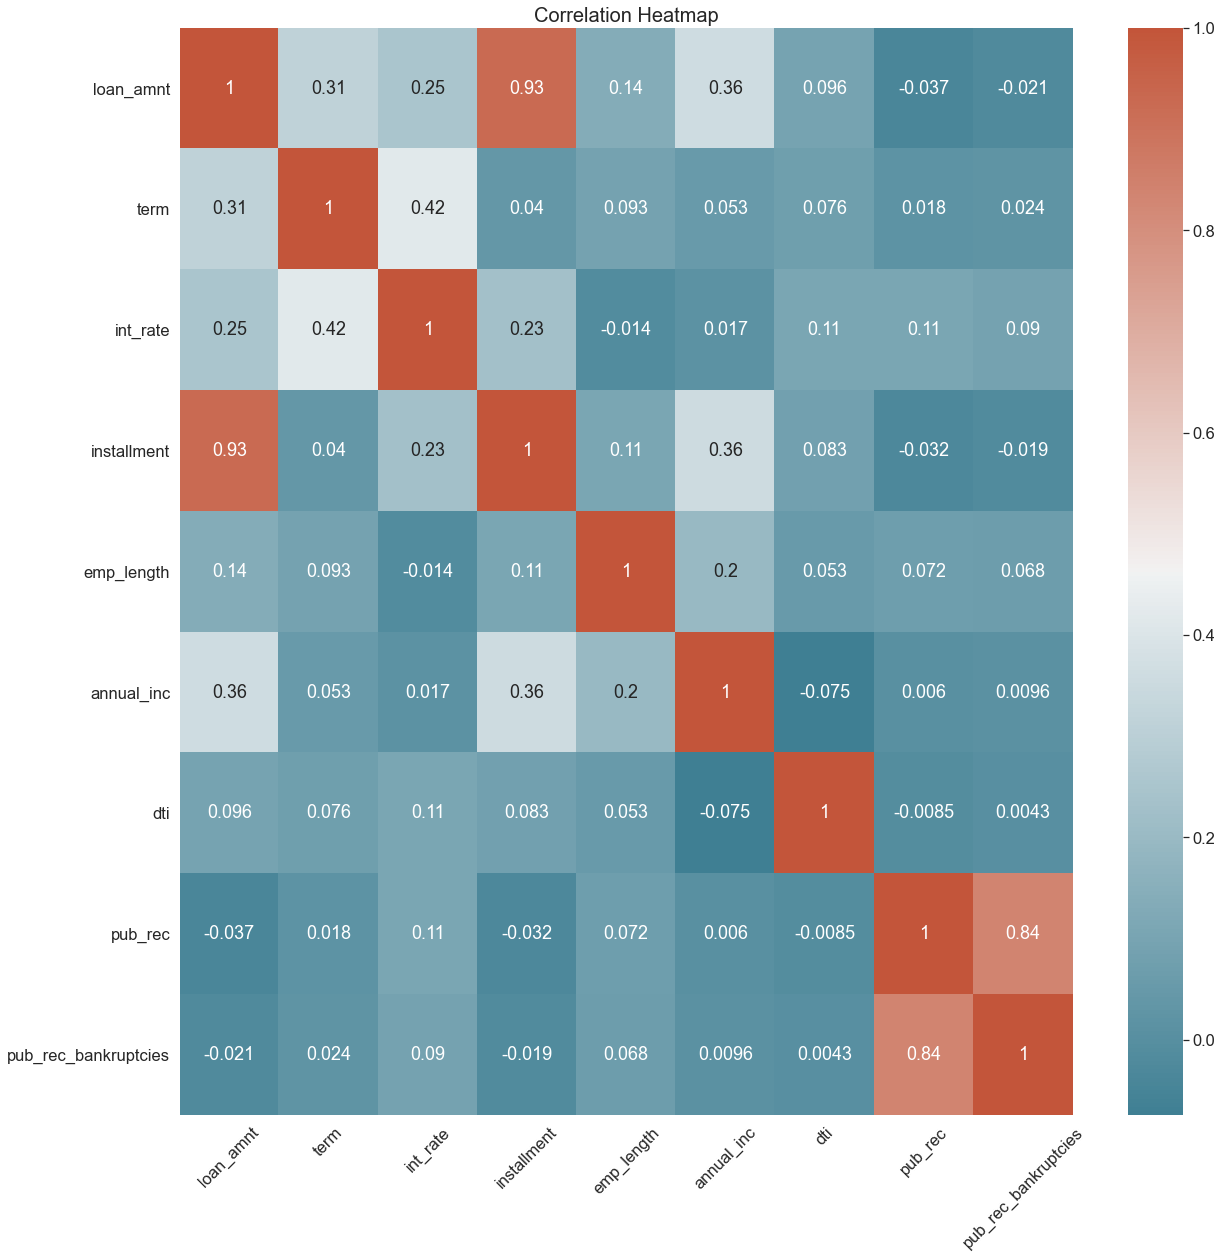

In [205]:
# calculate correlation matrix
corr = loan_df.corr()# plot the heatmap
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)
ax1 = sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
plt.title("Correlation Heatmap", fontsize=20)

plt.show()
sns.set()

## Key observations from above Heatmap:

### 1. Higher employment length, lesser the interest rate
### 2. Higher the requested LC loan amount, lesser the dti
### 3. Higher the annual income, lesser the dti (higher repayment capacity)
### 4. Higher the annual income, lesser the term of loan repayment
### 5. Higher the annual income, lesser the interest rate (More chances of Fully Paid status)

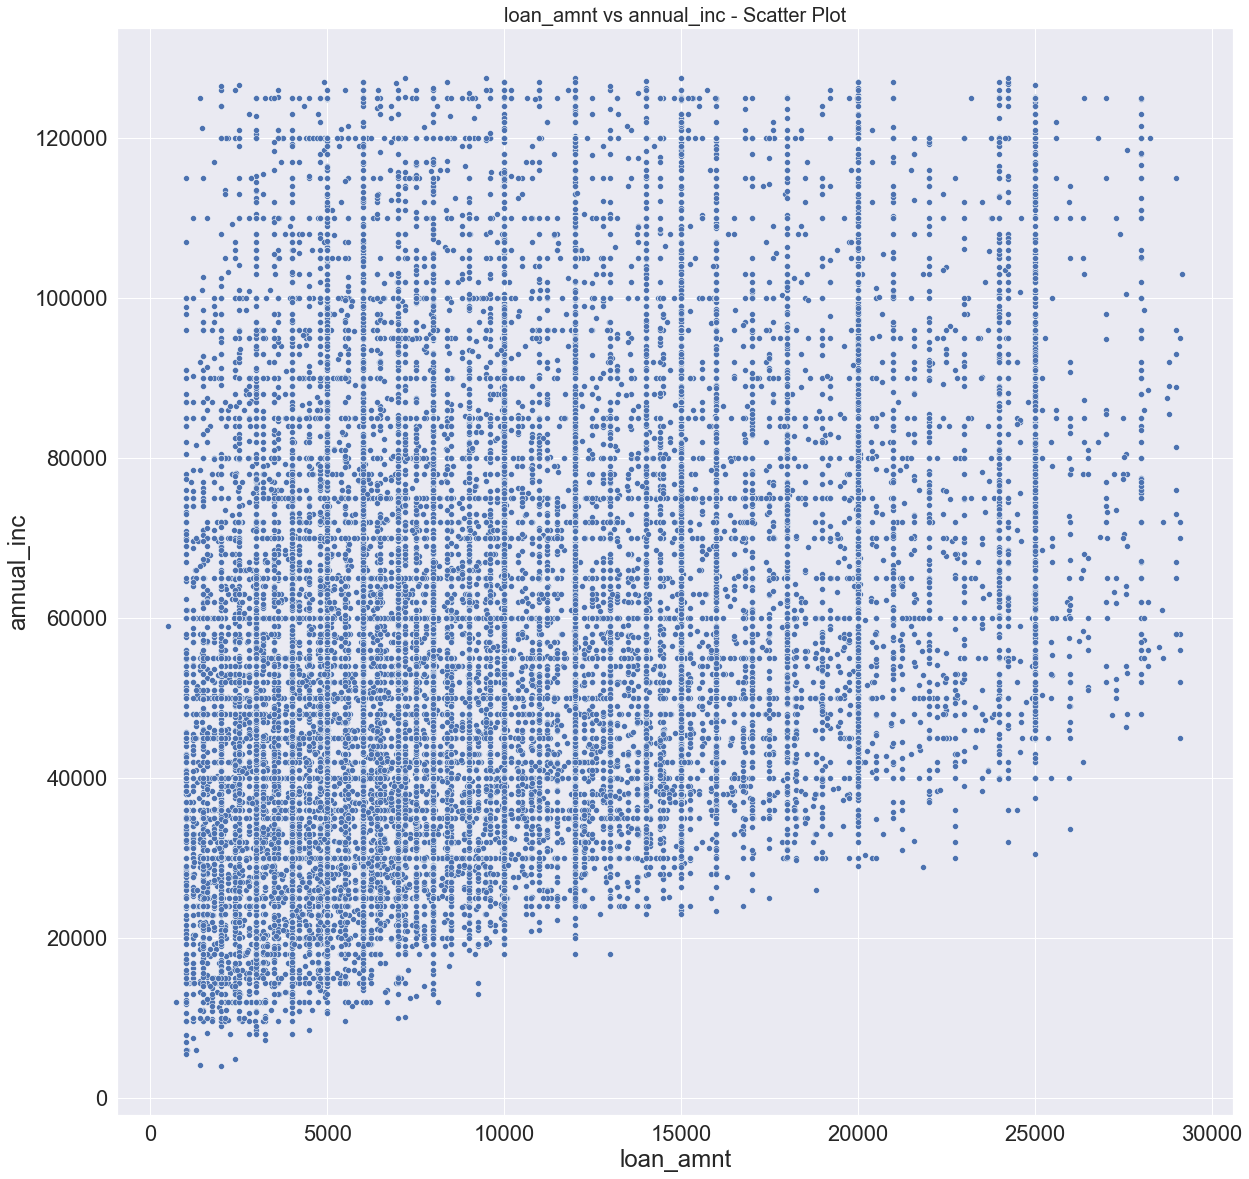

In [206]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.scatterplot(data=loan_df, x="loan_amnt", y="annual_inc")
plt.title("loan_amnt vs annual_inc - Scatter Plot", fontsize=20)
plt.show()
sns.set()

## Key observations from above Scatterplot:
### 1. Borrowers with lesser income are able to take only smaller amount of loan
### 2. Borrowers with higher income are able to take loans across all segments

# Recommendations for Lending Club:

### 1. Lending Club should give loans to borrowers who has lesser debt to income ratio.
### 2. Lending Club should try to grant loans for shorter terms.
### 3. Lending Club should avoid borrowers with higher public bankruptcy records.
### 4. Borrowers with higher public derogatory records are more likely to fully pay off their loans in order to improve their credit records.
### 5. Lending Club should improve their verification process to avoid the chances of getting any charged off borrowers.
### 6. Lending Club should target higher annual income borrowers. Because they take loan across all segments i.e. lower to higher loan amount.
### 7. Borrowers who took loan for the purpose of 'small_business' had the highest percentage of total loans that were charged off.
### 8. Borrowers with home_ownership as 'OTHER' were more likely to get charged off.